load lib and set path, jupyter setting

In [1]:
import pandas as pd
import numpy as np
DF = pd.DataFrame
Series = pd.Series
import sys 
import os
os.chdir("""C:\\Users\\demetoir_desktop\\PycharmProjects\\MLtools""")
# os.getcwd()
from tabulate import tabulate

from script.util.PlotTools import PlotTools
from script.util.misc_util import *
from script.data_handler.Base.df_plotterMixIn import DF_PlotTools
from script.data_handler.DatasetPackLoader import DatasetPackLoader
from script.data_handler.titanic import load_merge_set, titanic_null_cleaner, titanic_typecasting, titanic_transformer
from script.sklearn_like_toolkit.ClassifierPack import ClassifierPack

NpArr = np.array
DF = pd.DataFrame
df_Xs_keys = [
    'col_00_Age', 'col_01_Cabin', 'col_02_Embarked', 'col_03_Fare',
    'col_04_Name', 'col_05_Parch', 'col_06_PassengerId', 'col_07_Pclass',
    'col_08_Sex', 'col_09_SibSp', 'col_11_Ticket'
]

df_Ys_key = 'col_10_Survived'

plot = PlotTools(show=True, save=False, dpi=600)

merge_df = load_merge_set(cache=False)
origin_df = merge_df
cleaner = titanic_null_cleaner(merge_df.copy(), df_Xs_keys, df_Ys_key)
cleaned_df = cleaner.clean()

typecaster = titanic_typecasting(cleaned_df, df_Xs_keys, df_Ys_key)
type_casted_df = typecaster.type_cast()

transformer = titanic_transformer(type_casted_df, df_Xs_keys, df_Ys_key)
transformer_df = transformer.transform()

# merge_df.info()
# transformer_df.info()

# autocomplete setting 
%config IPCompleter.greedy=True

# print every line of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

transformer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
col_00_Age                      1309 non-null float64
col_02_Embarked                 1309 non-null object
col_03_Fare                     1309 non-null float64
col_04_Name                     1309 non-null object
col_05_Parch                    1309 non-null int32
col_06_PassengerId              1309 non-null int64
col_07_Pclass                   1309 non-null int64
col_08_Sex                      1309 non-null object
col_09_SibSp                    1309 non-null int32
col_10_Survived                 891 non-null float64
col_11_Ticket                   1309 non-null object
col_00_Age_binning              1309 non-null object
col_00_Age_intensity            1309 non-null float64
col_01_Cabin                    1309 non-null object
col_03_Fare_binning             1309 non-null object
col_03_Fare_intensity           1309 non-null float64
col_04_Name_first_name          1309 non-null

In [2]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

# null cleaning

In [3]:
df = DF(merge_df.isna().sum())
df['null_count'] = df[0]
df = df.drop(columns=0)


df = merge_df.groupby(['col_07_Pclass', df_Ys_key])['col_06_PassengerId'].count()
df = DF(df)
print(tabulate(df, tablefmt="grid", headers="keys"))


+----------+----------------------+
|          |   col_06_PassengerId |
+==========+======================+
| (1, 0.0) |                   80 |
+----------+----------------------+
| (1, 1.0) |                  136 |
+----------+----------------------+
| (2, 0.0) |                   97 |
+----------+----------------------+
| (2, 1.0) |                   87 |
+----------+----------------------+
| (3, 0.0) |                  372 |
+----------+----------------------+
| (3, 1.0) |                  119 |
+----------+----------------------+


titanic dataset의 총 데이터수는 1309개, 총 피쳐수는 10개 갸량된다.
titanic dataset에서는 titanic 침몰 사건에서 승객의 생존 여부를 맞추는것이 목표이다.
따라서 label이 생존, 사망 두가지인 binary classfication 문제로 볼수 있다.


feature의 경우 편의를 위하여 아래와 같이 각 feature 이름 앞에 번호를 추가하였다 .

col_n_FeatureName


## col_10_Survived
binanry classifcation 의 label에 해당하는 피쳐이다

전체 승객의 생존여부에 대한
승객의 38%의  생존하였고, 62%는 사망하였다.

따라서 단순히 모두 사망하였다고 추정하였을때 정확도는 62% 갸량 될것이다.

대부분의 label이 사망에 치중되어있어있다
각각 label별 데이터의 에서 200개 갸량 차이가 존재하지만..


모두 사망했다고 추정하여도 정확도는 62퍼센트 정도 된다 


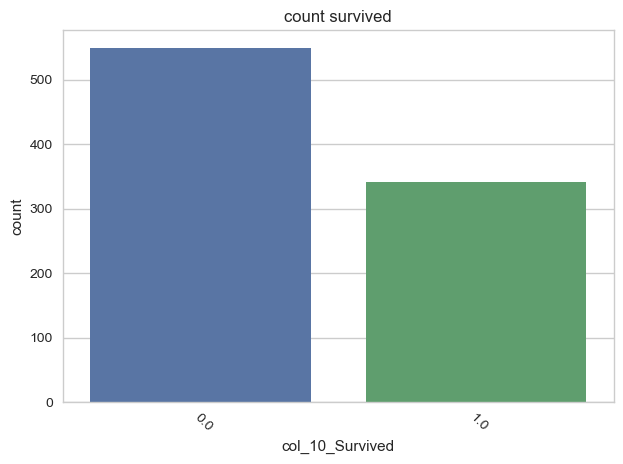

0.3838383838383838

In [138]:
plot.count(merge_df, df_Ys_key, title='count survived')
#TODO normalized plot count
merge_df[df_Ys_key].mean()

## col_00_Age
침몰 사고 당시 노약자에 해당하는 18세 미만의 승객과, 50세 이상의 승객들의 생존율이 더 높지 않을까?


col_00_Age는 승객의 나이로, 전체의 20%정도의 missing value가 존재한다. 20% 정도라면 다른 피쳐를 이용하여 나이늘 추정하는 방식으로 missing value 채우는 방법도 존재하지만 일단 먼저 데이터를 한번 분석해보고 결정해보자

먼저 missing value를 제외했을 때의 나이의 분포를 살펴보자

승객 나이의 평균은 28세 이고, 반조금 넘는 승객이 20 ~ 40세 이다.


0.20091673032849502

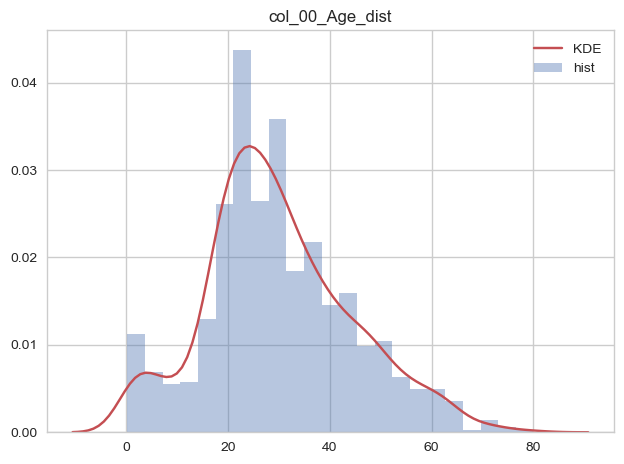

,col_00_Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [5]:
age_df = DF(merge_df[['col_00_Age']])
age_s = age_df['col_00_Age']
col = 'col_00_Age'


age_df_notna = merge_df[merge_df['col_00_Age'].notna()]
# age_df_notna.info()

age_df_na = merge_df[merge_df['col_00_Age'].isna()]
len(age_df_na)/1309
# age_df_na.info()

plot.dist(age_df_notna, 'col_00_Age', title='col_00_Age_dist')
age_df_notna[[col]].describe()

이제 각각 생존한 승객의 나이의 분포와 사망한 승객의 나이의분포를 비교해보자
눈에 띄는 점은 18세 이하의 승객들과 20~40세의 승객의 생존율이 가장 차이가 나는 것을 알수있다.

18세 미만의 승객의 생존율이 사망율보다 높지만, 50세이상의 승객들은 그러지 않다.

c:\programdata\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


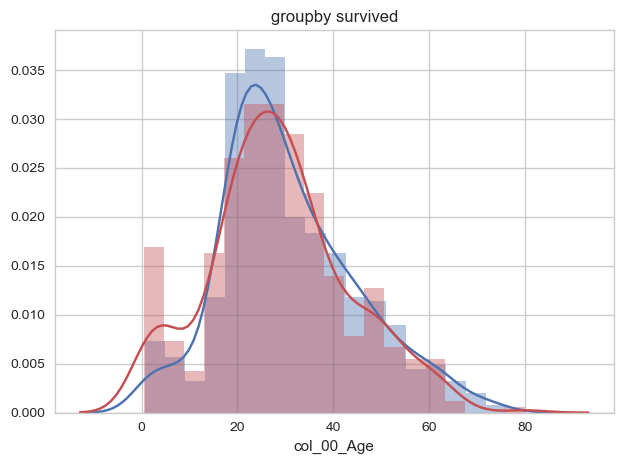

In [6]:
age_df = DF(merge_df[['col_00_Age']])
age_s = age_df['col_00_Age']
col = 'col_00_Age'
age_df_notna = merge_df[merge_df['col_00_Age'].notna()]
plot.dist_groupby(age_df_notna, 'col_00_Age', 'col_10_Survived', title='groupby survived')

이제 나이가 missing value인 승객들의 생존여부와 대해 살펴보자
나이의 값이 존재하는 승객의 생존율이 missing value 인 승객보다 높다


'notna_survived_mean = 0.4061624649859944, na_survived_mean = 0.2937853107344633'

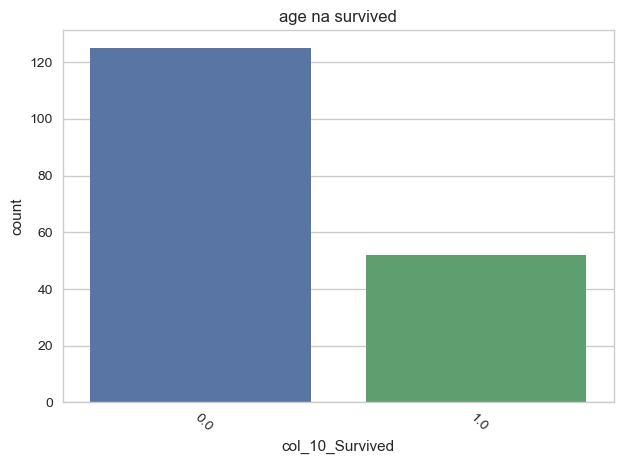

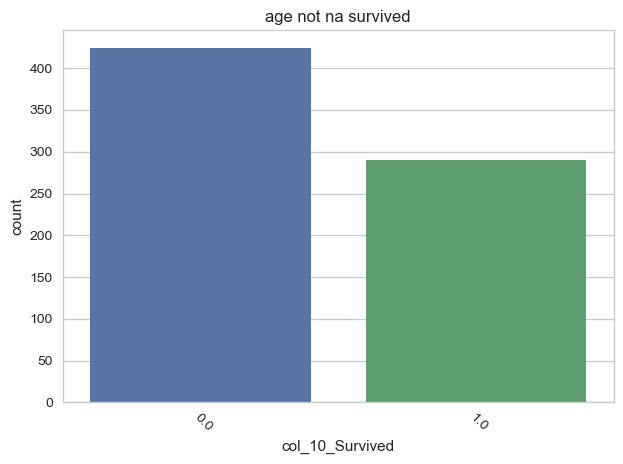

In [7]:
notna_survived_mean = merge_df[merge_df['col_00_Age'].notna()][df_Ys_key].mean()
na_survived_mean = merge_df[merge_df['col_00_Age'].isna()][df_Ys_key].mean()
f"notna_survived_mean = {notna_survived_mean}, na_survived_mean = {na_survived_mean}"

plot.count(merge_df[merge_df['col_00_Age'].isna()], df_Ys_key,
           title='age na survived')
plot.count(merge_df[merge_df['col_00_Age'].notna()], df_Ys_key,
          title='age not na survived')

c:\programdata\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


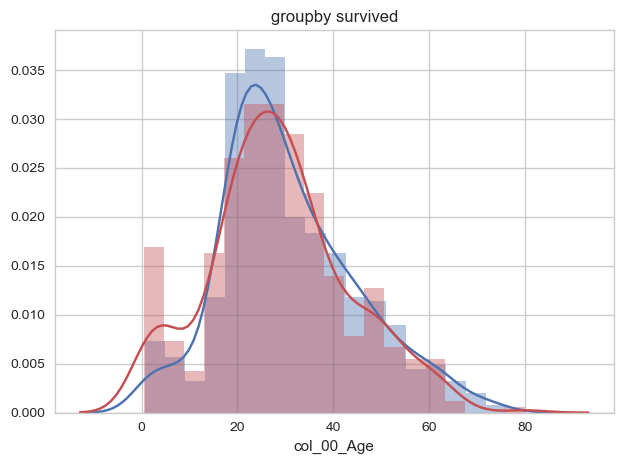

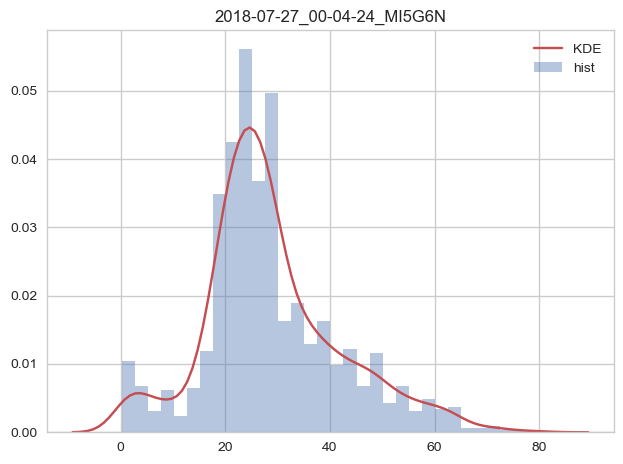

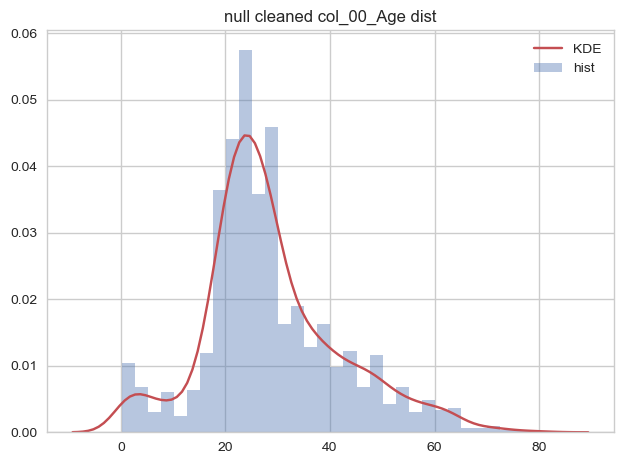

c:\programdata\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


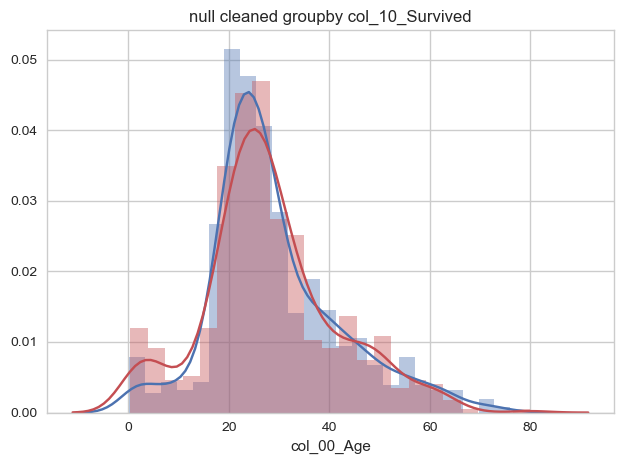

In [8]:
age_df = DF(merge_df[['col_00_Age']])
age_s = age_df['col_00_Age']
col = 'col_00_Age'
age_df_notna = merge_df[merge_df['col_00_Age'].notna()]
plot.dist_groupby(age_df_notna, 'col_00_Age', 'col_10_Survived', title='groupby survived')
plot.dist(cleaned_df, col)

age_df.loc[age_df['col_00_Age'].isna(), 'col_00_Age'] = np.random.randint(20, 30, size=263)
plot.dist(age_df, 'col_00_Age', title='null cleaned col_00_Age dist')

part = pd.concat([merge_df[['col_10_Survived']], age_df], axis=1)
plot.dist_groupby(part, 'col_00_Age', 'col_10_Survived', title='null cleaned groupby col_10_Survived')

지금까지 분석한 결과로 보았을때 나이를 일정 구간으로 나누었을때의 분석을 해보자..

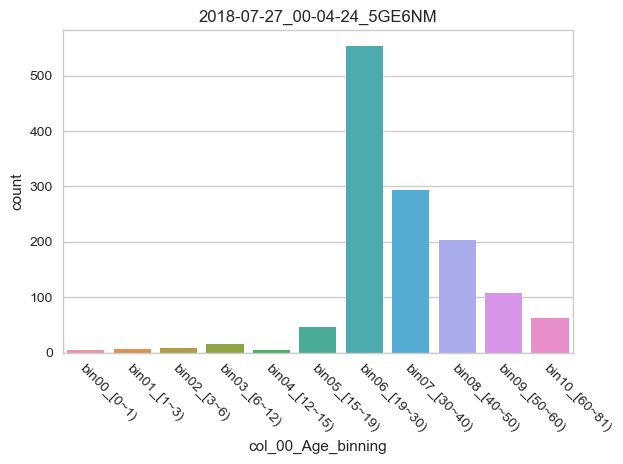

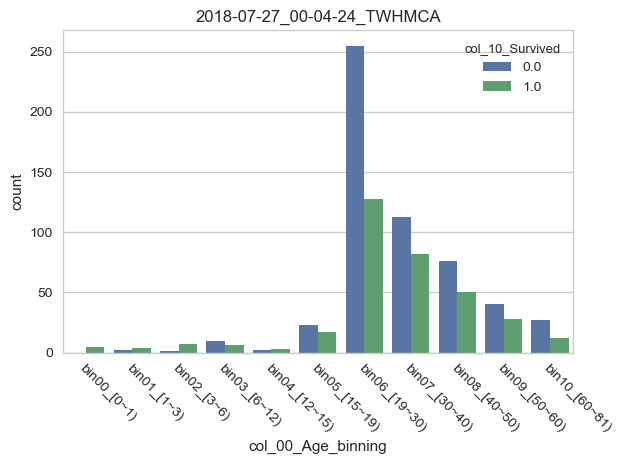

In [9]:
# transformer_df.info()
plot.count(transformer_df, 'col_00_Age_binning')
plot.count(transformer_df, 'col_00_Age_binning', df_Ys_key)

## col_01_Cabin
cabin 은 승객들이 이용하는 방이다. 

대부분의 값이 missing value 이다.
대부분의 값들은 앞에 알파벳 A~G, T 과 숫자가 합쳐진 형태이고, 일부는 숫자가 없거나, 여러개의 선실을 이용하는것으로 보인다.

타이타닉 정보를 좀더 데이터를 보면 앞의 알파벳은 선실이 위치하는 갑판의 위치를 나타내고, 숫자는 선실 번호인것을 알수있다.
따라서 알파벳만따로 분리하여 분석 해보자

missing value 인 승객과 A인 승객에 비해 B~F인 승객의 생존율이 높다 
값이 있는 데이터의 수가 적지지만 의미 있는 feature 로 생각된다

    The type of ticket you purchased, first, second, or third class, determined what accommodations you were able to access while on board the Titanic (Barratt, 2010). Each accommodation and area of the ship was located on one of the decks labeled “A” to “F” ("The ship," 2012). There were two additional decks below “F”, called Orlop and Lower Orlop deck, which was the location of the boilers and additional machinery (Barratt, 2010), as well as the squash/racquet court, post office, workshops, and cold storage ("The ship," 2012). “A” deck consisted of state rooms for first class passengers, public rooms for first class passengers, two first class entrances, reading room, lounge, smoke room, and a promenade for first class passengers. “B” deck held another first class stairway and reception room, a restaurant for first class passengers, a stairway for second class passengers, and a smoke room. “C” deck held the entrance for third class passengers, a third class promenade, and a library for second class passengers (Barratt, 2010). “C” deck also held third class general and smoking rooms and the purser’s office where passengers could purchase tickets for the Turkish bath, deck chairs, swimming pool, and electric baths ("The ship," 2012). “D” deck housed the main first class reception room and dining saloon and rooms used as hospitals. “E” deck contained the “working passage” which was a communication passage for crew and third class passengers. Using this passage, third class passengers had direct access to the third class dining room on “G” deck (Barratt, 2010). Also, “E” deck contained second and third class cabins ("The ship," 2012), and a ladder that went directly to the upper floor, “D” deck, in case the watertight bulkheads had to be closed (Barratt, 2010). “F” deck held the Turkish baths, electric baths, swimming pools, and the third class dining saloon ("The ship," 2012).

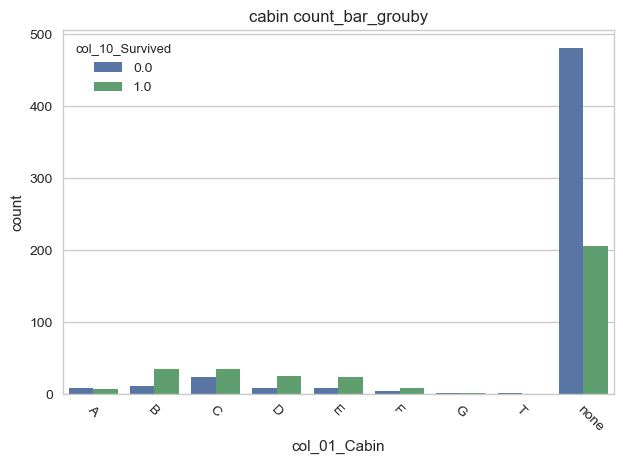

In [10]:
col = 'col_01_Cabin'
df_Ys_key = 'col_10_Survived'

Embarked_df = DF(merge_df[[col]])
Embarked_s = Embarked_df[col]

# plot.count(merge_df, col, title = 'cabin count_bar')
# plot.count(merge_df, col, groupby_col=df_Ys_key, title='cabin count_bar_grouby')

# plot.count(transformer_df, col, title = 'cabin count_bar')
plot.count(transformer_df, col, groupby_col=df_Ys_key, title='cabin count_bar_grouby')


## col_02_Embarked
Embarked 승객이 탑승한 장소를 나타낸다
S,Q,C 의 가지는것을 알수있고 대부분은 S 값을 가진다

2개가 missing value 존재하는데 대부분의 값이 S인것을 생각하면 S 로 추정하여도 문제 없어 보인다


null이존재함 대부분의 값은 S 값에 치중되어있음
따라서 null은 'S' 로 추정할수 있다



2

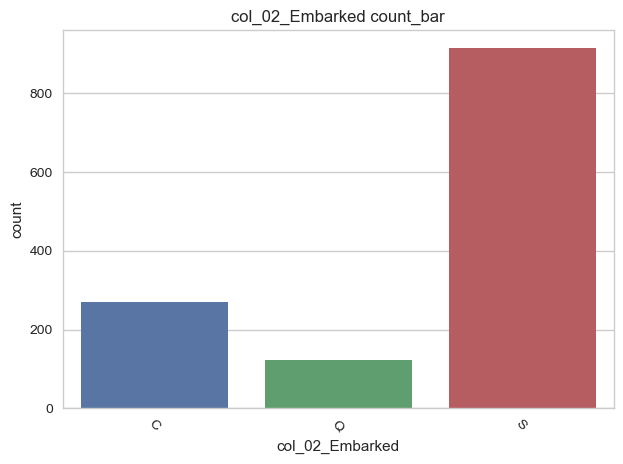

In [11]:
col = 'col_02_Embarked'
df_Ys_key = 'col_10_Survived'

Embarked_df = DF(merge_df[['col_02_Embarked']])
Embarked_s = Embarked_df[col]
Embarked_s.isna().sum()
plot.count(Embarked_df, col, title = 'col_02_Embarked count_bar')
# plot.count(merge_df, col, groupby_col=df_Ys_key, title='col_02_Embarked count_bar_grouby')

생존여부 별로 나누어서 보았을떄 
C인 승객의 생존율이 높다..

2

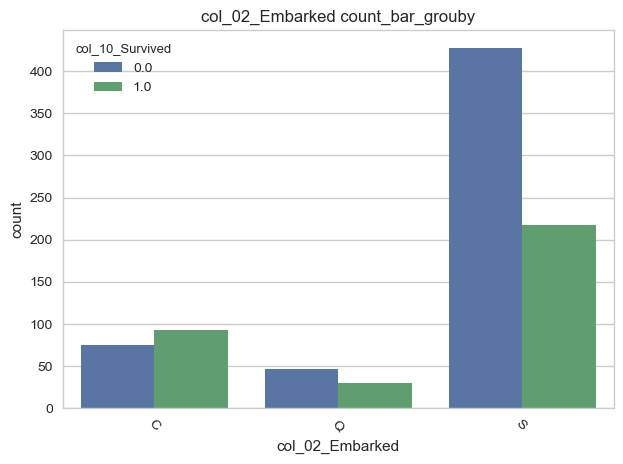

In [12]:
col = 'col_02_Embarked'
df_Ys_key = 'col_10_Survived'

Embarked_df = DF(merge_df[['col_02_Embarked']])
Embarked_s = Embarked_df[col]
Embarked_s.isna().sum()
plot.count(merge_df, col, groupby_col=df_Ys_key, title='col_02_Embarked count_bar_grouby')

## col_03_Fare
하나의 널값이 존재한다 
대부분의 값은 10 이하의 값을 가진다
구간 별로 나누어서 보자..


Ticket Prices for the Titanic when she sailed on her maiden voyage in 1912:

First Class Suite- £870 or $4,350.

First Class Berth- £30 or $150.

Second Class- £12 or $60.

Third Class- £3 to £8 or $40.

Fare는 비용으로 나누어지 지 않았을까?
기본 탑승비 ,짐 보관비 등등으로 합산한 결과 가 아닌가?



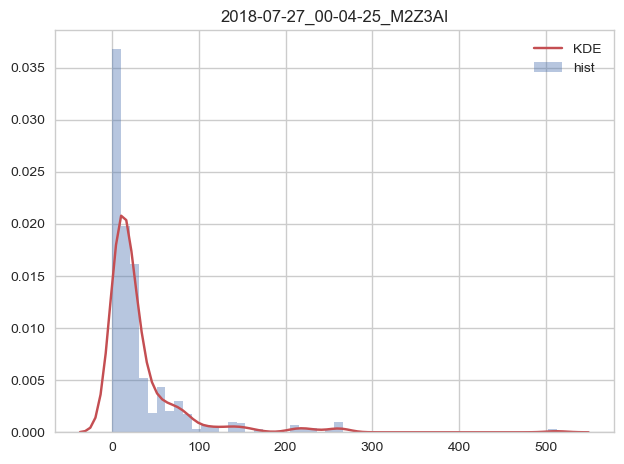

c:\programdata\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\programdata\anaconda3\envs\tensor\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


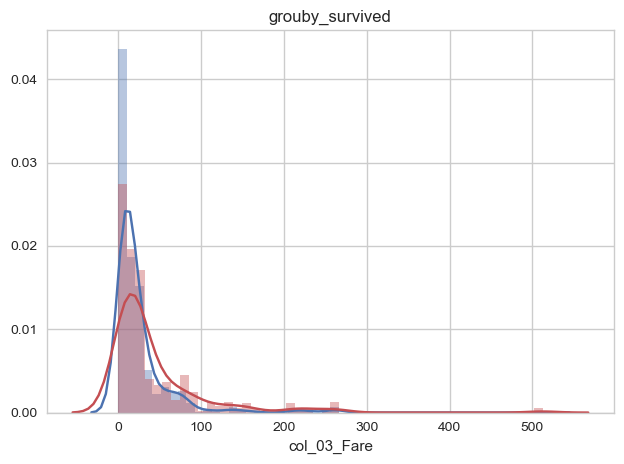

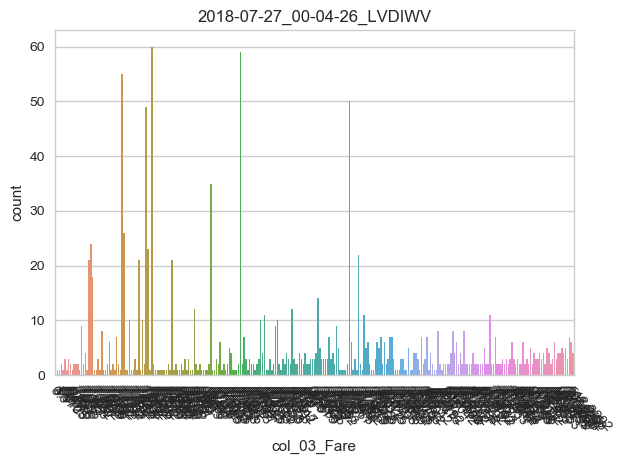

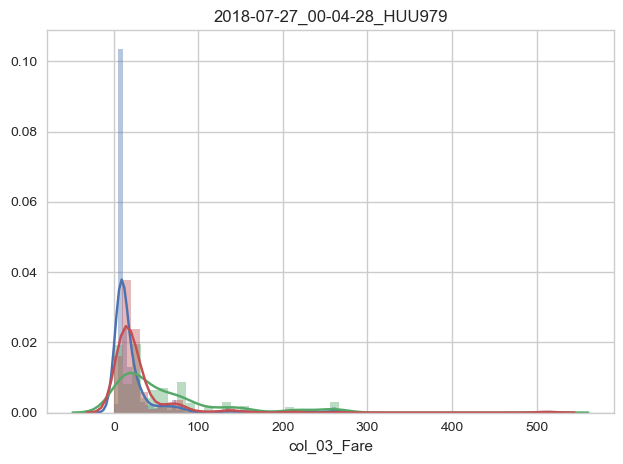

In [13]:
col = 'col_03_Fare'
df_Ys_key = 'col_10_Survived'

Fare_df = DF(merge_df[['col_03_Fare']])
Fare_s = Fare_df[col]

# merge_df[[col, 'col_07_Pclass']].head(10)
merge_df[col] = merge_df[col].fillna(5)

plot.dist(merge_df, col)
plot.dist_groupby(merge_df, col, df_Ys_key, title='grouby_survived')
plot.count(merge_df, col)

plot.dist_groupby(merge_df, col, 'col_07_Pclass')


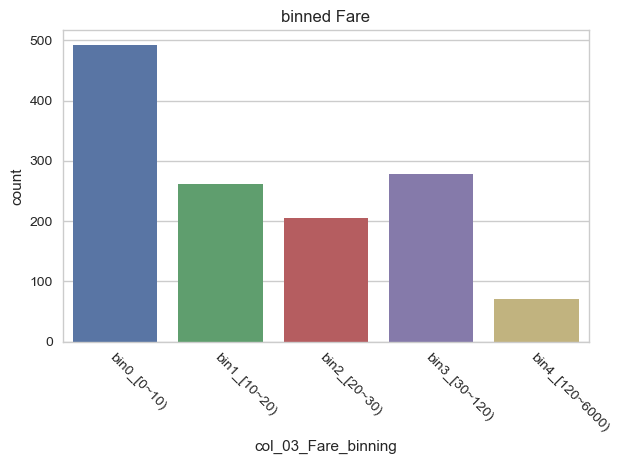

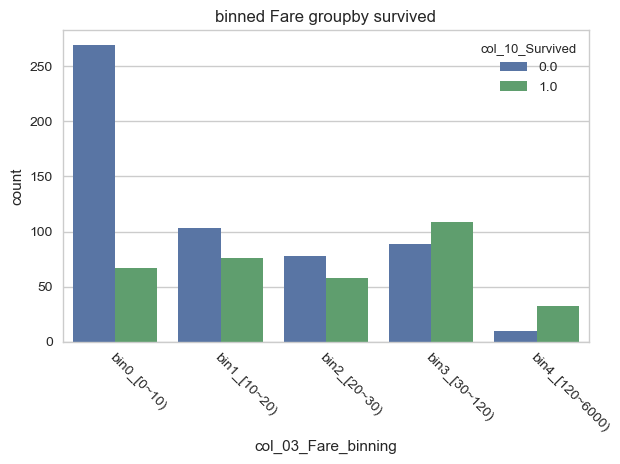

In [14]:
# transformer_df.info()
plot.count(transformer_df, 'col_03_Fare_binning', title='binned Fare')
plot.count(transformer_df, 'col_03_Fare_binning', df_Ys_key,
          title='binned Fare groupby survived')

# col_04_Name

이름을 살펴보면
성, 존칭. 이름 으로 이루어져있다

대부분은 
여자의 경우 miss, mrs로 기혼 여부를 알수 있다

이름을 가지고 출신 국가나 인종을 추정할수있지않을까?
대부분은 영어를 사용할줄 알겟지만..





In [15]:
col = 'col_04_Name'
# merge_df[[col]].head()

# transformer_df.info()
Honorific_col = 'col_04_Name_Honorific'

transformer_df[Honorific_col].value_counts()
master = transformer_df[transformer_df[Honorific_col] == 'Master'][[df_Ys_key, 'col_00_Age']]


transformer_df.groupby([Honorific_col,  'col_08_Sex'])[ ['col_00_Age',df_Ys_key]].agg(['mean', 'min', 'max', 'count'])


Mr                     757
Miss                   260
Mrs                    197
Master                  61
Honorific_half_died     14
Honorific_most_died     12
Honorific_survived       8
Name: col_04_Name_Honorific, dtype: int64

col_00_Age                     \
                                       mean    min   max count   
col_04_Name_Honorific col_08_Sex                                 
Honorific_half_died   female      49.000000  49.00  49.0     1   
                      male        45.384615  21.00  60.0    13   
Honorific_most_died   female      39.000000  39.00  39.0     1   
                      male        43.454545  27.00  70.0    11   
Honorific_survived    female      29.857143  24.00  48.0     7   
                      male        49.000000  49.00  49.0     1   
Master                male         7.796393   0.33  27.0    61   
Miss                  female      22.340731   0.17  63.0   260   
Mr                    male        30.513210  11.00  80.0   757   
Mrs                   female      35.299492  14.00  76.0   197   

                                 col_10_Survived                  
                                            mean  min  max count  
col_04_Name_Honorific col_08_Sex                                  
Honorific_half_died   female            1.000000  1.0  1.0     1  
                      male              0.400000  0.0  1.0    10  
Honorific_most_died   female                 NaN  NaN  NaN     0  
                      male              0.000000  0.0  0.0     9  
Honorific_survived    female            1.000000  1.0  1.0     6  
                      male              1.000000  1.0  1.0     1  
Master                male              0.575000  0.0  1.0    40  
Miss                  female            0.697802  0.0  1.0   182  
Mr                    male              0.156673  0.0  1.0   517  
Mrs                   female            0.792000  0.0  1.0   125

# col_05_Parch
parent / child


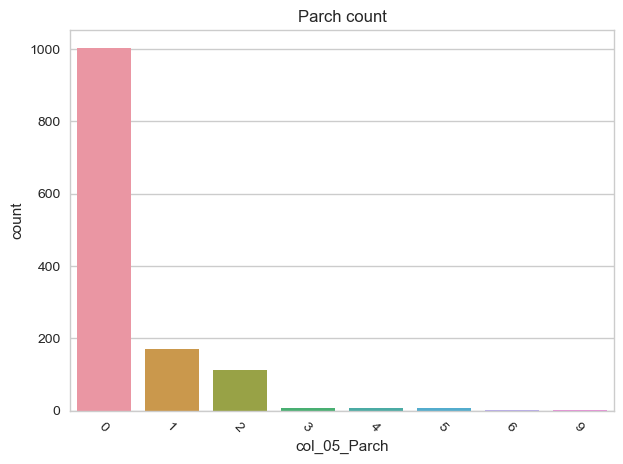

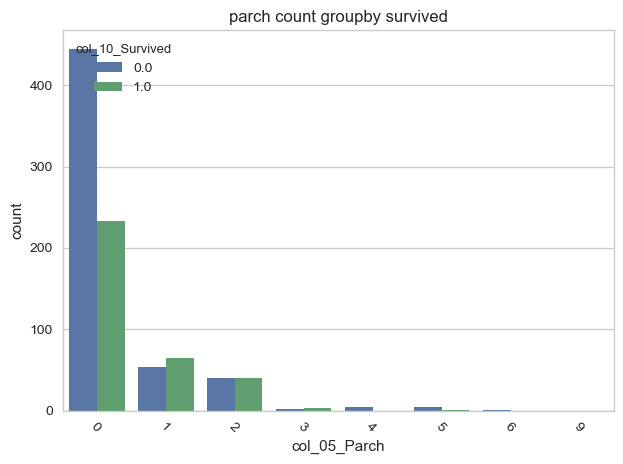

In [16]:
col= 'col_05_Parch'

Parch_df = DF(merge_df[[col]] )
Parch_s = Parch_df[col]

plot.count(merge_df, col, title='Parch count')

plot.count(merge_df, col, df_Ys_key, title='parch count groupby survived')


# col_06_PassengerId
쓸모 없는 놈이다 버리자..

# col_07_Pclass
승객들이 몇등석인지 의 정보
1등석과 2등석은 의 생존율이 매우 높다...


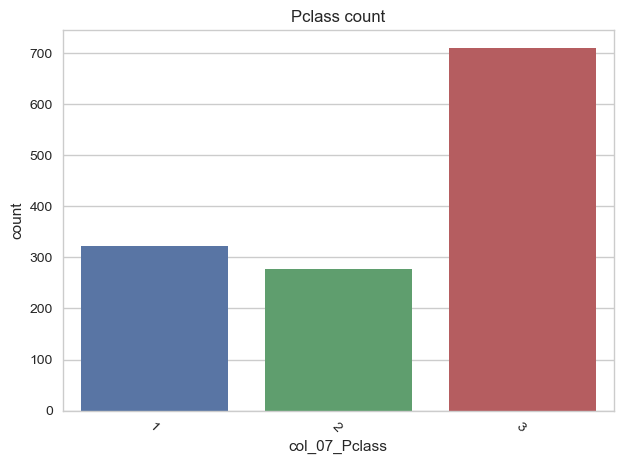

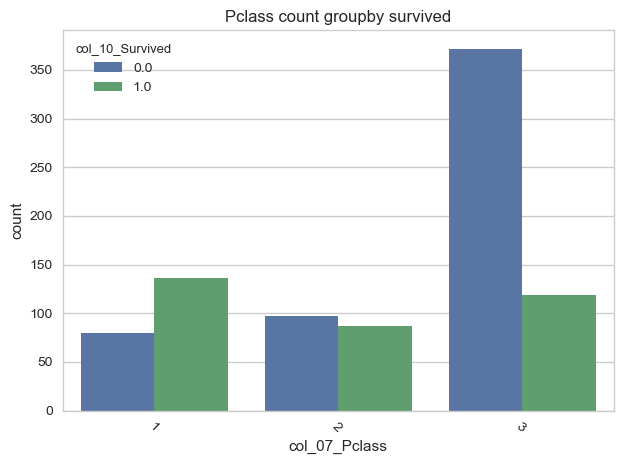

In [17]:
col= 'col_07_Pclass'

Parch_df = DF(merge_df[[col]] )
Parch_s = Parch_df[col]

plot.count(merge_df, col, title='Pclass count')

plot.count(merge_df, col, df_Ys_key, title='Pclass count groupby survived')


# col_08_Sex

성별 가장 큰 피쳐일것이다..
단순히 여자는 살고 남자는 죽었다고 추정했을떄 79퍼센트가 된다..


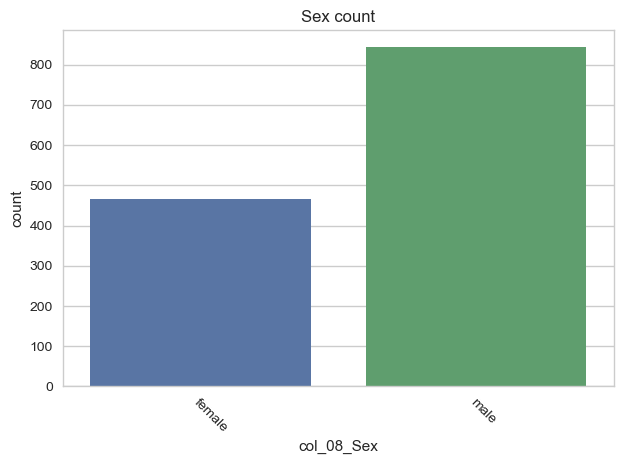

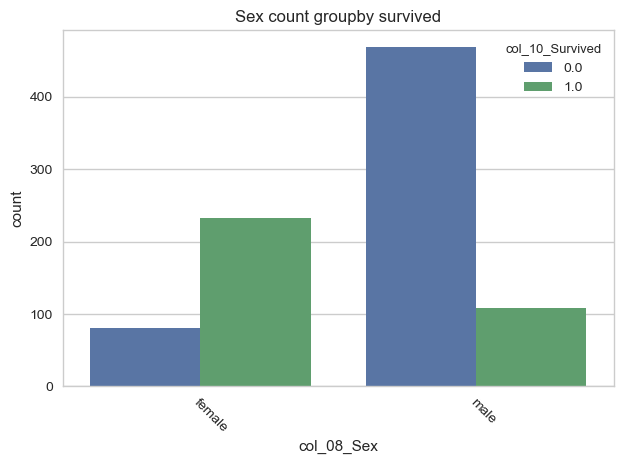

NameError: name 'simple_prob' is not defined

In [18]:
col= 'col_08_Sex'

Parch_df = DF(merge_df[[col]] )
Parch_s = Parch_df[col]

plot.count(merge_df, col, title='Sex count')

plot.count(merge_df, col, df_Ys_key, title='Sex count groupby survived')


# merge_df.groupby(col)[df_Ys_key].agg(['mean', 'sum', 'count'])
# merge_df[[col, df_Ys_key]]


simple_prob(merge_df, col, df_Ys_key)


# col_09_SibSp

parch 처럼 비슷한 양상을 보인다
0일때의 생존율이 낮고, 많을수록 더 높은 생존율을 진다

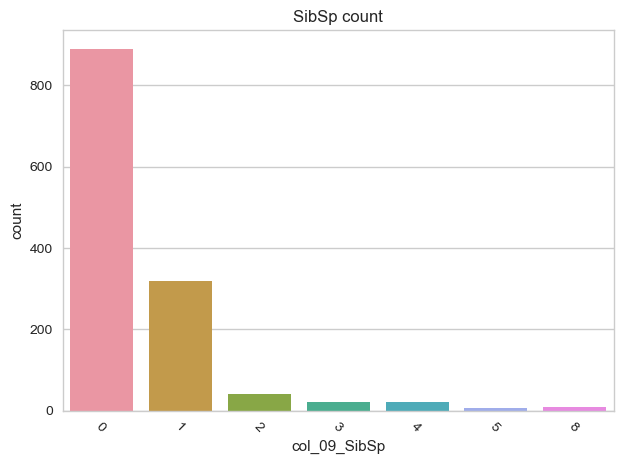

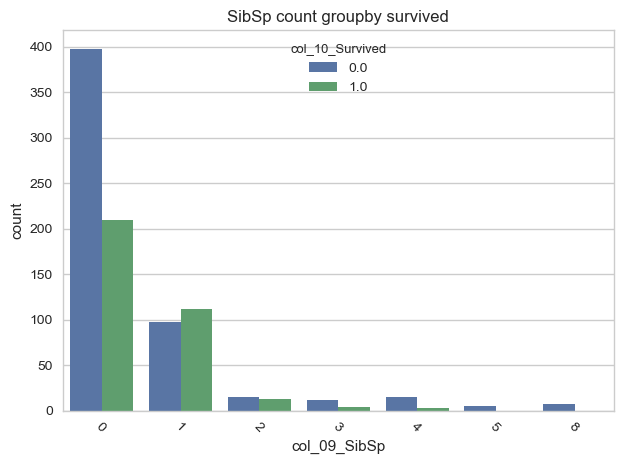

In [19]:
col= 'col_09_SibSp'

Parch_df = DF(merge_df[[col]] )
Parch_s = Parch_df[col]

plot.count(merge_df, col, title='SibSp count')

plot.count(merge_df, col, df_Ys_key, title='SibSp count groupby survived')

# col_11_Ticket

티켓 만 가지고 생존율을 구할수는 없음 
그러나 현대의 티겟과 달리 일행의 티켓은 비슷한 값을 가진다..
일행인지 여부는 알수있을것니다..


In [ ]:
col= 'col_11_Ticket'

Parch_df = DF(merge_df[[col]] )
Parch_s = Parch_df[col]

plot.count(merge_df, col, title='ticket count')
plot.count(merge_df, col, df_Ys_key, title='ticket count groupby survived')

## family_size  
sibsp와 parch이 각각 가족과 관련된 feature로, sibsp + parch + 1일경우 가족수의 수이다.


family_size를 보면 가족이 한명인 경우 혼자인경우 생존율이 30% 갸량된다.
2~4인일때 생존율이 55% 넘어가고,  5인 이상일 경우 생존율은 30%미만이다.



In [ ]:
col = 'col_12_family_size'
df = DF(merge_df)
df[col] = df['col_05_Parch'] + df['col_09_SibSp'] + 1

df.groupby(col)[df_Ys_key].mean()

plot.count(df, col, title='family size countbar')
plot.count(df, col, df_Ys_key, title='family size countbar')


In [ ]:
plot.count(transformer_df, 'col_12_family_size_binning', title='family_size')
plot.count(transformer_df, 'col_12_family_size_binning', df_Ys_key, title='family_size groupby survived')

## group_first_name_count

꼭 모든 사람이 혼자이거나 가족끼리 탔다고 생각 할수는 없다. 가족은 아니자만 친척이거나 결혼 안한 커플이거나 친구일수도 있다..

In [ ]:
col = 'roommate_size'

# plot.count(transformer_df, col)
# plot.count(transformer_df, col, df_Ys_key)

df = DF(merge_df)
df['col_12_family_size'] = df['col_05_Parch'] + df['col_09_SibSp'] + 1
# plot.count(df, 'col_12_family_size', df_Ys_key, title='family size countbar')

col_12_family_size = 'col_12_family_size'

groupby_family = df.groupby(col_12_family_size)[df_Ys_key].agg(['mean', 'count'])
groupby_roommate = transformer_df.groupby(col)[df_Ys_key].agg(['mean', 'count'])

def simple_prob(df, groupby_col, y_col):
    df['dummy'] = [0] * len(df)
    groupby = df.groupby([y_col, groupby_col], )['dummy'].agg(['count']).unstack(fill_value=0).stack()
    unique = df[groupby_col].unique()
    
    acc = 0.0
    for val in list(unique):
        a = groupby.loc[(0,val),'count' ]
        b = groupby.loc[(1,val), 'count']
#         print(a,b)
        acc += max(a,b)
        print(max(a,b))
    print(acc)

    print(groupby.loc[(0,1),:])
    print(len(df))
    
    return acc / len(df)


simple_prob(df, col_12_family_size, df_Ys_key)
simple_prob(transformer_df, col, df_Ys_key)


## is_alone
완전히 혼자인 경우



## roomate with not family 
일행중 가족이 아닌 사람이 포함된 경우




In [ ]:
col = 'with_not_only_family'

plot.count(transformer_df, col)

plot.count(transformer_df, col, df_Ys_key)

simple_prob(transformer_df, col, df_Ys_key)